<a href="https://colab.research.google.com/github/swetharaomasadi/AIML_2024/blob/main/ass7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('/content/data.csv')

# Print the data
print(data)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Drop columns with all NaN values (if any)
data.dropna(axis=1, how='all', inplace=True)

# Drop rows with any NaN values
data.dropna(inplace=True)

# Extract features and target
X = data.drop(['diagnosis'], axis=1)  # Features
y = data['diagnosis']  # Target

# Display the cleaned dataset
print("Cleaned Dataset:")
print(data.head())

# Display the shape of features and target
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Cleaned Dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimete

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setting styles for seaborn
sns.set(style="whitegrid")


In [8]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Prepare dictionary format to access the data using keys
data_dict = {
    'data': breast_cancer.data,
    'target': breast_cancer.target,
    'feature_names': breast_cancer.feature_names,
    'target_names': breast_cancer.target_names
}


In [9]:
# Describe feature names
print("Feature Names:")
for i, feature_name in enumerate(data_dict['feature_names']):
    print(f"{i+1}. {feature_name}")


Feature Names:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness
6. mean compactness
7. mean concavity
8. mean concave points
9. mean symmetry
10. mean fractal dimension
11. radius error
12. texture error
13. perimeter error
14. area error
15. smoothness error
16. compactness error
17. concavity error
18. concave points error
19. symmetry error
20. fractal dimension error
21. worst radius
22. worst texture
23. worst perimeter
24. worst area
25. worst smoothness
26. worst compactness
27. worst concavity
28. worst concave points
29. worst symmetry
30. worst fractal dimension


In [10]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names'])

# Add target column to DataFrame
df['target'] = data_dict['target']

# Describe DataFrame
print("\nDataFrame Details:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



DataFrame Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

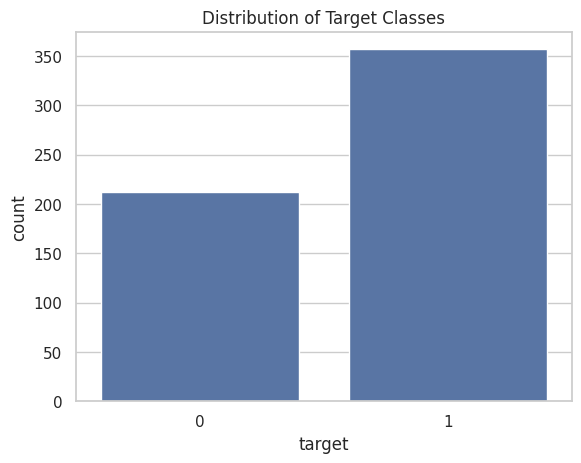

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up Seaborn style
sns.set(style="whitegrid")

# Exploratory Analysis
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.show()


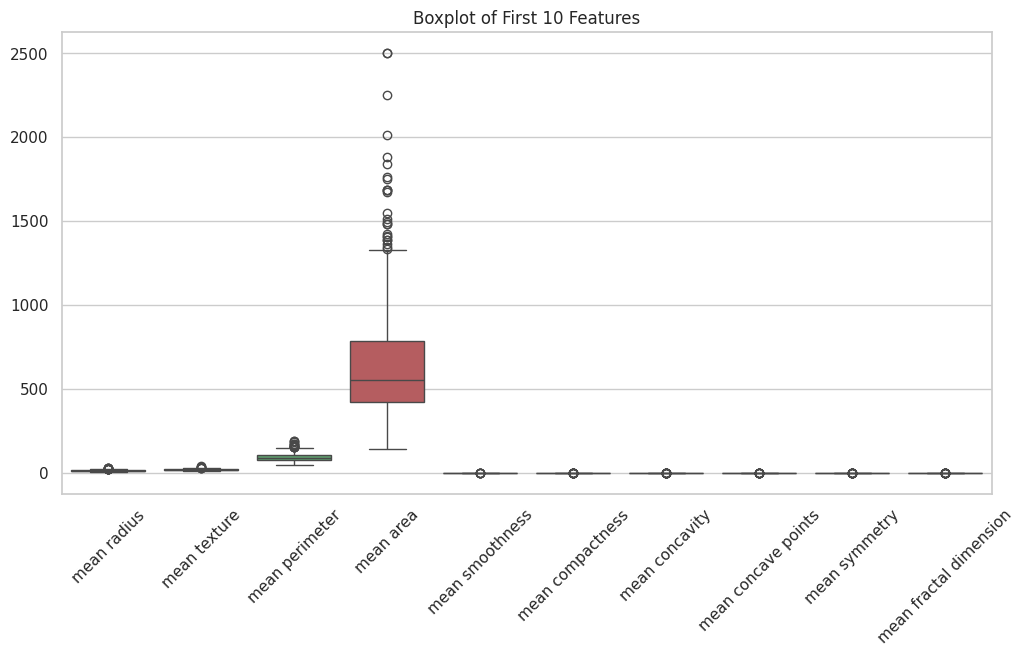

In [12]:
# Boxplot of first 10 columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.title('Boxplot of First 10 Features')
plt.xticks(rotation=45)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Drop the target column and define DataFrame with only target results
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (455, 30)
Shape of y_train: (455,)
Shape of X_test: (114, 30)
Shape of y_test: (114,)


In [14]:
from sklearn.svm import SVC

# Create an instance of SVC
svc_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels and other hyperparameters as needed

# Fit the model to the training dataset
svc_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the target labels for the test dataset
y_pred = svc_model.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[39  4]
 [ 1 70]]


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Create an instance of SVC
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the training dataset
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict the target labels for the test dataset using the best estimator
best_svc_model = grid_search.best_estimator_
y_pred_grid = best_svc_model.predict(X_test)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_grid))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score: 0.9494505494505494

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[39  4]
 [ 2 69]]
